In [2]:
#importando pandas e biblioteca gráfico

import pandas as pd 

import matplotlib.pyplot as plt





In [ ]:
#definindo caminho arquivo
arquivo = 'C:\\Users\\a481688\\Documents\\Case\\Dados Case.csv'

# importando arquivo
df = pd.read_csv(arquivo, sep=';')

# printando dataframe 
df





,mes_ref,data_competencia,status_ordem_venda,canal_1,codigo_cliente,empresa,fabrica,codigo_setor_atividade,codigo_produto,ROL_Receita,VOL_Volume
0,2024-05-01,2024-05-22,FATURAMENTO,HOME CENTER,1085118,DECA,METAIS,MS,2031.GL33,492,2
1,2024-02-01,2024-02-20,FATURAMENTO,VAREJO,1052646,DECA,METAIS,MS,2280.BL.MT,12742,5
2,2024-01-01,2024-01-12,FATURAMENTO,VAREJO,1052620,DECA,METAIS,MS,4688.224,184,5
3,2024-04-01,2024-04-22,FATURAMENTO,VAREJO,1054712,DECA,METAIS,MS,2550.E.112.BR,1211,11
4,2024-06-01,2024-06-30,FATURAMENTO,VAREJO,1053639,DECA,METAIS,MS,2550.E.112.BE,926,7
...,...,...,...,...,...,...,...,...,...,...,...
2870889,2025-05-01,2025-05-08,VENDA,VAREJO,1260076,DECA,METAIS,MS,1198.C33,955,3
2870890,2025-05-01,2025-05-08,VENDA,VAREJO,1260076,DECA,METAIS,MS,1502.B.212,2190,7
2870891,2025-05-01,2025-05-09,FATURAMENTO,VAREJO,1011684,DECA,METAIS,MS,1984.C.ACT.LNK.CR,457,2
2870892,2025-05-01,2025-05-09,FATURAMENTO,ENGENHARIA,1009634,DECA,LOUÇAS,LS,P.510.17,8464,16


## Overview

In [12]:
#dados gerais
produtos_distintos = df['codigo_produto'].nunique()
empresas_distintas = df['empresa'].nunique()
fabricas_distintas = df['fabrica'].nunique()
clientes_distintos = df['codigo_cliente'].nunique()
faturamento_total  = df['ROL_Receita'].sum()
n_transacoes       = len(df)  
ticket_medio       = faturamento_total/n_transacoes
meses_distintos    = df['mes_ref'].nunique()
media_faturamento_mensal =faturamento_total/meses_distintos
media_transacoes_mensais =n_transacoes/meses_distintos

# Transacoes Distintas
print("Transações Totais")
print(f"{n_transacoes:,.0f}".replace(",", "X").replace(".", ",").replace("X", "."))

print("Media Transacoes Mensais")
print (f"{media_transacoes_mensais:,.0f}".replace(",", "X").replace(".", ",").replace("X", "."))

#Produtos Distintos
print("Produtos Distintos Vendidos")
print(produtos_distintos)

# Clientes Distintos
print ("Clientes Distintos Atendidos ")
print (clientes_distintos)

# TM
print("Ticket Médio")
print(f"R$ {ticket_medio:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Media Faturamento Mensal
print("Media Faturamento Mensal")
print(f"R$ {media_faturamento_mensal:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Faturamento Total
print("Faturamento Total")
print(f"R$ {faturamento_total:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

# Referencia aos meses
print("*REF: 01/24-07/25*")


Transações Totais
2.870.894
Media Transacoes Mensais
151.100
Produtos Distintos Vendidos
7825
Clientes Distintos Atendidos 
20437
Ticket Médio
R$ 2.544,81
Media Faturamento Mensal
R$ 384.519.745,16
Faturamento Total
R$ 7.305.875.158,00
*REF: 01/24-07/25*


## Receitas Agrupadas 


In [ ]:
# Agrupa receita por empresa e fabrica
receita_por_fabrica = df.groupby(['empresa', 'fabrica'])['ROL_Receita'].sum().reset_index()
receita_por_setor_atividade = df.groupby(['codigo_setor_atividade'])['ROL_Receita'].sum().reset_index()

mapa_setores = {
    "RC": "Revenda Construção",
    "LS": "Louças",
    "MS": "Mármore e Superfície"
}

# Agrupa o faturamento por setor de atividade
faturamento_setor = df.groupby('codigo_setor_atividade')['ROL_Receita'].sum().reset_index()

# Usa o dicionário para rebatizar
faturamento_setor['codigo_setor_atividade'] = faturamento_setor['codigo_setor_atividade'].map(mapa_setores)

# Total geral de faturamento
total_faturamento = faturamento_setor['ROL_Receita'].sum()

# Calcula proporção (%)
faturamento_setor['perc_total'] = (faturamento_setor['ROL_Receita'] / total_faturamento) * 100

# Formata colunas
faturamento_setor['ROL_Receita'] = faturamento_setor['ROL_Receita'].apply(
    lambda x: f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)
faturamento_setor['perc_total'] = faturamento_setor['perc_total'].apply(lambda x: f"{x:.2f}%")

# Ordena do maior para o menor
faturamento_setor = faturamento_setor.sort_values(by='perc_total', ascending=False)

print(faturamento_setor)

# Proporcao por setor atividade

# Total por empresa (para % dentro da empresa)
total_por_empresa = receita_por_fabrica.groupby('empresa')['ROL_Receita'].transform('sum')

# Total geral (para % global)
total_geral = receita_por_fabrica['ROL_Receita'].sum()


# Calcula as duas porcentagens
receita_por_fabrica['perc_empresa'] = (receita_por_fabrica['ROL_Receita'] / total_por_empresa) * 100
receita_por_fabrica['perc_total'] = (receita_por_fabrica['ROL_Receita'] / total_geral) * 100

# Formata em string com "%" no final
receita_por_fabrica['perc_empresa'] = receita_por_fabrica['perc_empresa'].apply(lambda x: f"{x:.2f}%")
receita_por_fabrica['perc_total'] = receita_por_fabrica['perc_total'].apply(lambda x: f"{x:.2f}%")

# Formata valores em R$
receita_por_fabrica['ROL_Receita'] = receita_por_fabrica['ROL_Receita'].apply(
    lambda x: f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

# Ordena resultado
receita_por_fabrica = receita_por_fabrica.sort_values(by=['empresa', 'perc_total'], ascending=[True, False])

print(receita_por_fabrica)



  codigo_setor_atividade         ROL_Receita perc_total
1   Mármore e Superfície  R$2.904.891.696,00     39.76%
2     Revenda Construção  R$2.225.786.097,00     30.47%
0                 Louças  R$2.175.197.365,00     29.77%
  empresa    fabrica         ROL_Receita perc_empresa perc_total
1    DECA     METAIS  R$2.904.891.696,00       57.18%     39.76%
0    DECA     LOUÇAS  R$2.175.197.365,00       42.82%     29.77%
2      RC      CEUSA    R$373.184.952,00       16.77%      5.11%
3      RC  PORTINARI  R$1.852.601.145,00       83.23%     25.36%


## Faturamento Histórico (01-24 à 07-25)

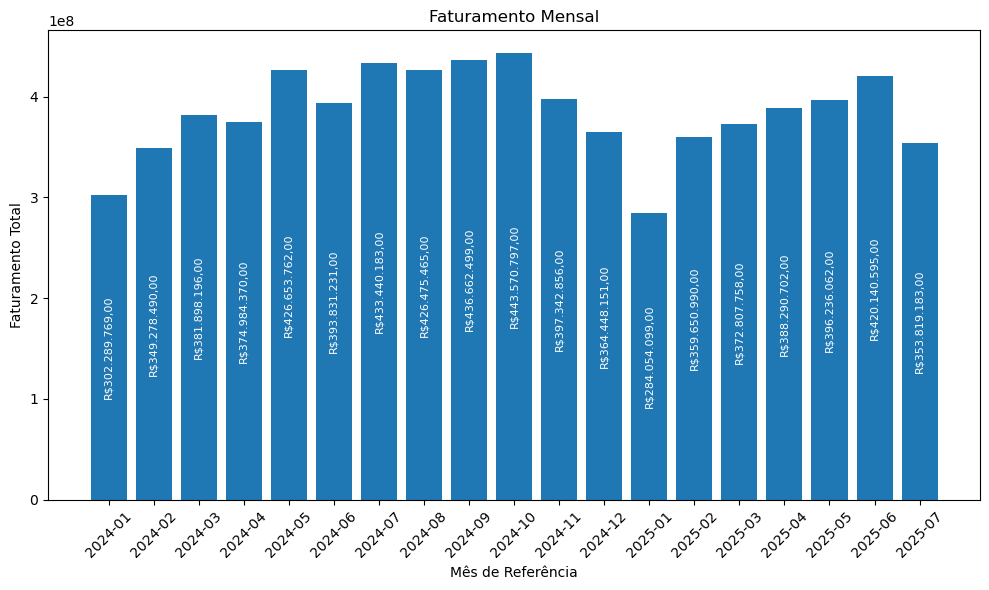

In [139]:
# Agrupar, ordenar e formatar
faturamento_mensal = (
    df.groupby('mes_ref')['ROL_Receita'].sum().reset_index()
    .rename(columns={'ROL_Receita': 'faturamento_total'})
    .sort_values('mes_ref')
)
# garantir datetime antes do strftime
import pandas as pd
faturamento_mensal['mes_ref'] = pd.to_datetime(faturamento_mensal['mes_ref'])
faturamento_mensal['mes_ref'] = faturamento_mensal['mes_ref'].dt.strftime('%Y-%m')

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_mensal['mes_ref'], faturamento_mensal['faturamento_total'])
plt.title('Faturamento Mensal')
plt.xlabel('Mês de Referência')
plt.ylabel('Faturamento Total')
plt.xticks(rotation=45)

# Rótulos em cada barra (com ,00 no final)
for bar, v in zip(bars, faturamento_mensal['faturamento_total']):
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height() * 0.5       # meio da barra; mude para v + desloc se quiser no topo
    plt.text(x, y,
             f'R${v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
             ha='center', va='center', fontsize=8, rotation=90, color='white')

plt.tight_layout()
plt.show()


## Top 10 Produtos ( em volume vendas )

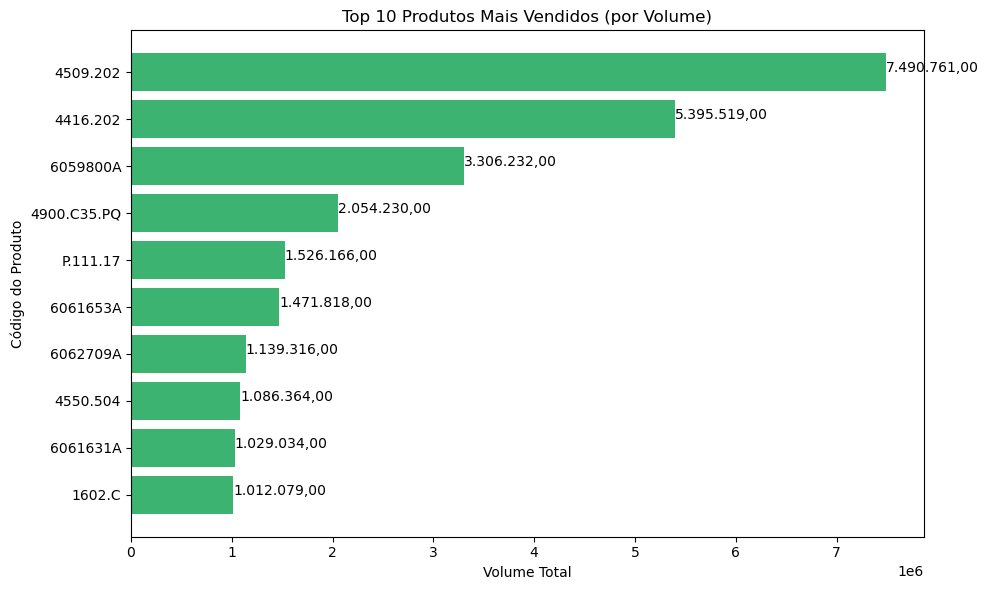

In [136]:
#produtos mais vendidos volume top 10

produtos_mais_vendidos = df.groupby('codigo_produto')['VOL_Volume'].sum().sort_values(ascending=False).reset_index()
produtos_mais_vendidos.columns = ['codigo_produto', 'volume_total']
produtos_mais_vendidos.head(10)

#top 10 produtos por volume
top_10_produtos = produtos_mais_vendidos.head(10)

#criando gráfico 
plt.figure(figsize=(10, 6))
plt.barh(top_10_produtos['codigo_produto'], top_10_produtos['volume_total'], color='mediumseagreen')
plt.title('Top 10 Produtos Mais Vendidos (por Volume)')
plt.xlabel('Volume Total')
plt.ylabel('Código do Produto')
plt.gca().invert_yaxis()

# Adiciona os rótulos de volume total ao lado de cada barra
for i, v in enumerate(top_10_produtos['volume_total']):
    plt.text(v, i, f'{v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')) 

plt.tight_layout()

## Top 10 Produtos ( em receita vendas)


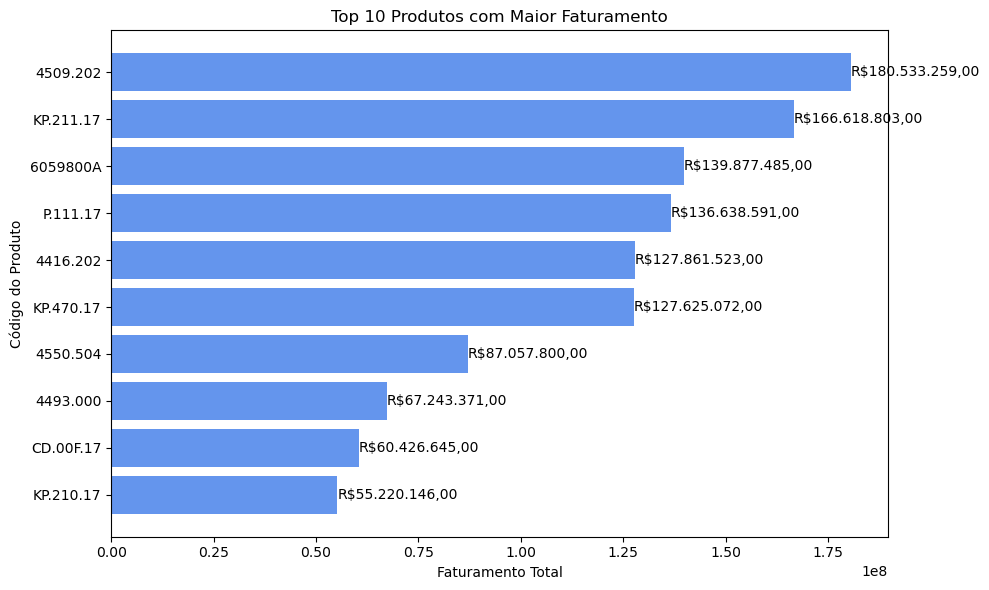

In [135]:
# produtos mais vendidos  receita top 10
produtos_mais_faturaram = df.groupby('codigo_produto')['ROL_Receita'].sum().sort_values(ascending=False).reset_index()
produtos_mais_faturaram.columns = ['codigo_produto', 'faturamento_total']

produtos_mais_faturaram.head(10)

# top 10 produtos faturamento 
top_10_faturamento = produtos_mais_faturaram.head(10)

#criando gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_10_faturamento['codigo_produto'], top_10_faturamento['faturamento_total'], color='cornflowerblue')
plt.title('Top 10 Produtos com Maior Faturamento')
plt.xlabel('Faturamento Total')
plt.ylabel('Código do Produto')
plt.gca().invert_yaxis()  # para o maior ficar no topo

# Adiciona rótulo com valor em cada barra
for i, v in enumerate(top_10_faturamento['faturamento_total']):
      plt.text(v, i, f'R${v:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'), 
         va='center', ha='left')
   

plt.tight_layout()
plt.show()

## Ticket Médio Cliente X Geral 

Ticket Medio Geral R$: 2.544,81
Total de clientes: 20437
Clientes = ou acima do TM geral: 6980
Clientes abaixo do TM geral: 13457
34.15% dos clientes têm ticket médio igual ou acima do TM geral
65.85% dos clientes têm ticket médio abaixo do TM geral


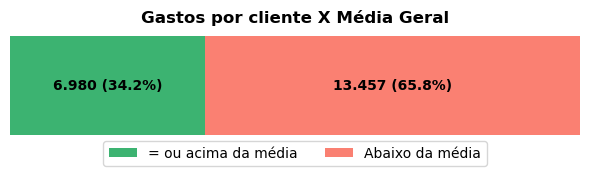

In [24]:

# Ticket médio por cliente (total gasto / número de compras)
ticket_medio_clientes = (
    df.groupby('codigo_cliente')['ROL_Receita'].sum() /
    df.groupby('codigo_cliente')['ROL_Receita'].count()
).reset_index()

ticket_medio_clientes.columns = ['codigo_cliente', 'ticket_medio']

# Ticket Medio Geral
faturamento_total  = df['ROL_Receita'].sum()
n_transacoes       = len(df)  
ticket_medio       = faturamento_total/n_transacoes

# Clientes Acima
clientes_acima = ticket_medio_clientes[ticket_medio_clientes['ticket_medio'] >= ticket_medio]
clientes_abaixo= ticket_medio_clientes[ticket_medio_clientes['ticket_medio'] < ticket_medio]

# Quantidade total de clientes
total_clientes = ticket_medio_clientes.shape[0]

# Quantidade de clientes acima
qtd_acima = clientes_acima.shape[0]
qtd_abaixo = clientes_abaixo.shape[0]

# Percentual
percentual = (qtd_acima / total_clientes) * 100
percentual_abaixo = (qtd_abaixo/total_clientes) * 100

print(f"Ticket Medio Geral R$: {ticket_medio:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"Total de clientes: {total_clientes}")
print(f"Clientes = ou acima do TM geral: {qtd_acima}")
print(f"Clientes abaixo do TM geral: {qtd_abaixo}")
print(f"{percentual:.2f}% dos clientes têm ticket médio igual ou acima do TM geral")
print(f"{percentual_abaixo:.2f}% dos clientes têm ticket médio abaixo do TM geral")

# Dados
valores = [qtd_acima, qtd_abaixo]
labels = ['= ou acima da média', 'Abaixo da média']
cores = ['mediumseagreen', 'salmon']

# Cálculo de percentual
percentuais = [v / total_clientes * 100 for v in valores]

# Cria a figura
fig, ax = plt.subplots(figsize=(6, 2))

# Plot barra empilhada
left = 0
for i in range(len(valores)):
    ax.barh(y=0, width=valores[i], left=left, color=cores[i], label=labels[i])
    
    # Rótulo com número + percentual
    ax.text(left + valores[i]/2, 0, 
            f'{valores[i]:,} ({percentuais[i]:.1f}%)'.replace(',', '.'),
            va='center', ha='center', fontsize=10, color='black', fontweight='bold')
    
    left += valores[i]

# Remoção de eixos desnecessários
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(0, total_clientes)
ax.set_title('Gastos por cliente X Média Geral', fontsize=12, fontweight='bold')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

plt.box(False)
plt.tight_layout()
plt.show()